In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
training_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

9
AxesImage(54,36;334.8x217.44)


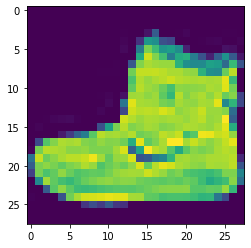

In [6]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
print(training_labels[0])
print(plt.imshow(training_images[0]))

In [7]:
training_images = training_images/255.0
test_images = test_images/255.0

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [9]:
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4990 - accuracy: 0.8258
Epoch 2/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3748 - accuracy: 0.8644
Epoch 3/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3384 - accuracy: 0.8756
Epoch 4/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3157 - accuracy: 0.8838
Epoch 5/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2965 - accuracy: 0.8900


In [11]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.3367 - accuracy: 0.8790


[0.33668804743885994, 0.879]

In [12]:
classifications = model.predict(test_images)
print(classifications[0])

[1.6358167e-07 8.5038945e-09 6.4786406e-07 5.4267164e-09 6.5574184e-08 3.9716177e-03 3.2014038e-06 3.7844073e-02 2.0197936e-06 9.5817822e-01]


In [13]:
print(test_labels[0])

9


Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 

In [15]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 139us/sample - loss: 0.4742
Epoch 2/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3572
Epoch 3/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3207
Epoch 4/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2985
Epoch 5/5
10000/10000 [==============================] - 1s 83us/sample - loss: 0.3482
[1.2517555e-06 1.3458416e-08 7.3556956e-09 5.0261822e-10 1.6763579e-09 4.8094080e-04 5.3940425e-07 4.7034333e-03 2.1626878e-09 9.9481392e-01]
9


In [18]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.1863
Epoch 2/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0786
Epoch 3/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0547
Epoch 4/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0418
Epoch 5/5
10000/10000 [==============================] - 1s 59us/sample - loss: 0.0837
[5.1409605e-09 4.0832134e-08 3.9851093e-06 8.8165289e-06 2.1918223e-09 3.8631445e-08 3.3001275e-12 9.9998605e-01 3.0318510e-09 1.0488029e-06]
7


In [19]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print("\nLoss is low so cancelling training!")
            self.model.stop_training = True

In [20]:
# Instantiate the Class
callbacks = myCallback()

In [22]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/5
59616/60000 [============================>.] - ETA: 0s - loss: 0.1853 - accuracy: 0.9434
Loss is low so cancelling training!
10000/10000 [==============================] - 1s 64us/sample - loss: 0.1106 - accuracy: 0.9651
[1.0801951e-06 1.4075315e-05 1.3422969e-04 2.5635019e-05 2.9208305e-08 1.2436897e-06 1.5532596e-09 9.9978572e-01 1.7850738e-07 3.7796966e-05]
7
